In [1]:
import pandas as pd, numpy as np
import requests, re, locale
from datetime import datetime
from bs4 import BeautifulSoup

In [2]:
locale.setlocale(locale.LC_TIME, 'es_ES.UTF-8')

'es_ES.UTF-8'

In [77]:
#Definición de Función Scrappeadora
def scrap(url,
          cols = ['titulo', 'fecha', 'precio']
         ):
    """
    Devuelve un df con datos de una web - customizada para datos del rosgan
    url: str - dirección web
    cols = list - nombrs de columnas
    """
    r = requests.get(url = url)
    soup = BeautifulSoup(r.text, 'lxml')
    data = soup.find_all('dl', class_ = 'remate')
    data = pd.DataFrame([(e.dt.text, e.dd.div.span.text) for e in data])
    data[cols[:2]] = data[0].str.split('-', expand = True)
    data[cols[2]] = data[1].str.extract(pat = r'(\d{1,4}.\d{1,2})').astype(float)
    data[cols[0]] = data[cols[0]].str.strip()
    data[cols[1]] = pd.to_datetime(
        data[cols[1]].str.extract(r'(([0-9]|[1-3][0-9]) de ([a-z]{4,10}) de (19|20)\d{2})')[0], 
        format = r'%d de %B de %Y'
    )
    return data[cols]#.set_index('fecha').sort_index()

In [78]:
# Carga de datos precio rosgan y resampleo mensual OJO
url_rosgan = r'https://www.rosgan.com.ar/precios-rosgan/'
rosgan_precio = scrap(url = url_rosgan)
rosgan_precio.head()

,titulo,fecha,precio
0,Especial Expoagro,2022-03-09,341.95
1,Rosgan Nro.154,2022-02-10,283.38
2,Rosgan Nro.153,2022-01-19,272.04
3,Rosgan Nro.152,2021-12-16,289.82
4,Rosgan Nro.151,2021-11-10,262.67


<AxesSubplot:xlabel='fecha'>

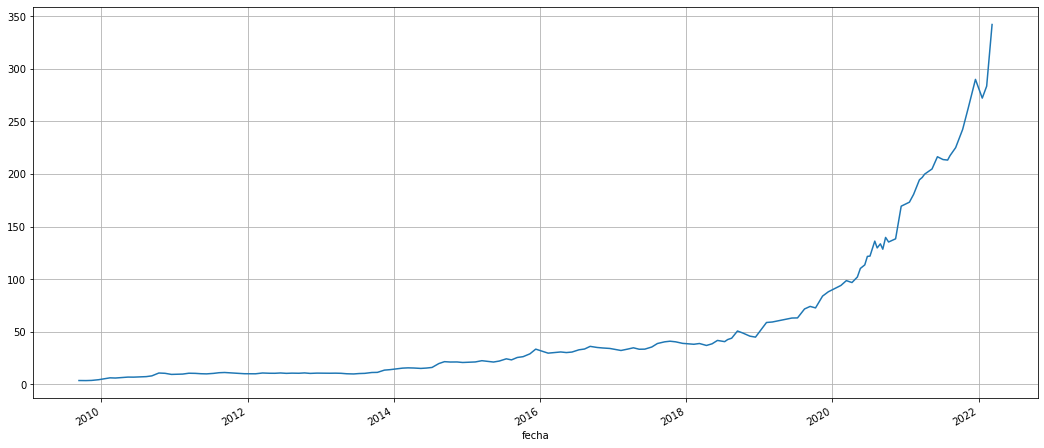

In [79]:
# Gráfico
rosgan_precio.set_index('fecha').sort_index()['precio'].plot(logy = False, figsize = (18, 8), grid = True)